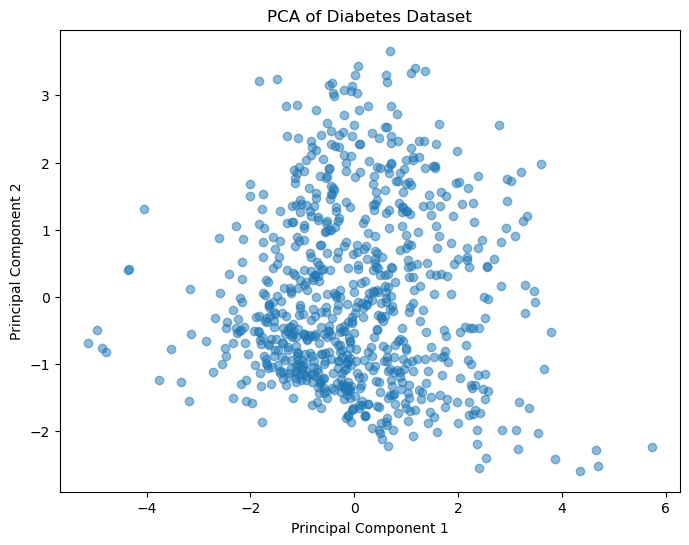

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
data = pd.read_csv('diabetes.csv')

# 2. 데이터 전처리 (필요에 따라)
# 결측치가 있는 경우 이를 처리합니다 (예: 평균값으로 대체).
data = data.dropna()

# 3. 데이터 스케일링 (PCA 적용 전)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])  # 마지막 열이 레이블인 경우 제외

# 4. PCA 모델 생성 및 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# 5. PCA 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 6. 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Diabetes Dataset')
plt.show()


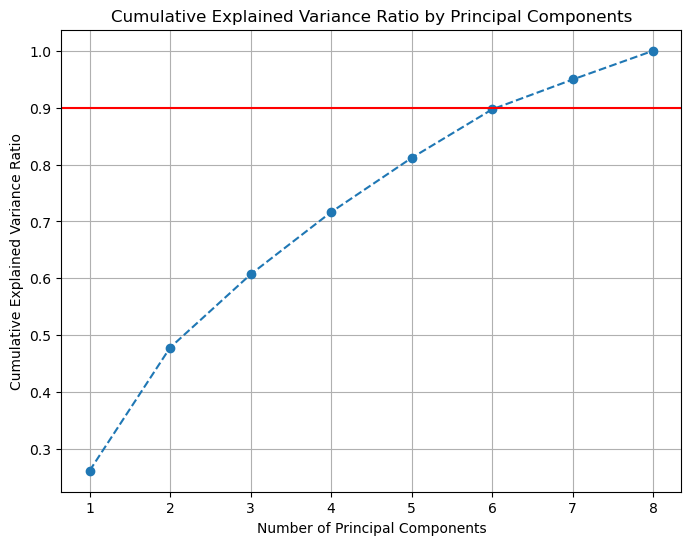

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 불러오기
data = pd.read_csv('diabetes.csv')

# 2. 데이터 스케일링 (PCA 적용 전)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])  # 마지막 열이 레이블인 경우 제외

# 3. PCA 모델 생성 및 적용 (모든 주성분 계산)
pca = PCA()
pca.fit(scaled_data)

# 4. 누적 분산 비율 계산
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 5. 누적 분산 비율 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.axhline(y=0.9, color='r', linestyle='-')  # 90% 라인 표시
plt.grid(True)
plt.show()


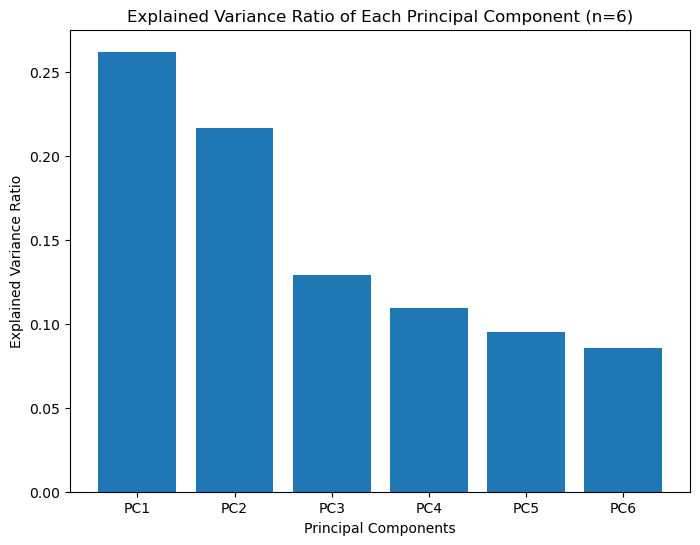

In [3]:
# PCA 모델 생성 및 6개의 주성분으로 축소
pca = PCA(n_components=6)
principal_components = pca.fit_transform(scaled_data)

# 6개 주성분의 설명력
explained_variance_ratio = pca.explained_variance_ratio_

# 각 주성분의 설명력 시각화
plt.figure(figsize=(8, 6))
plt.bar(range(1, 7), explained_variance_ratio, tick_label=[f'PC{i}' for i in range(1, 7)])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Each Principal Component (n=6)')
plt.show()


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 불러오기 및 전처리
data = pd.read_csv('diabetes.csv')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])  # 레이블을 제외하고 스케일링

# PCA 수행
pca = PCA(n_components=6)
pca.fit(scaled_data)

# PCA 로딩 행렬 확인
loading_matrix = pca.components_

# 각 주성분별로 기여도가 큰 속성 확인
feature_names = data.columns[:-1]  # 레이블 제외
for i, component in enumerate(loading_matrix):
    loading_scores = dict(zip(feature_names, component))
    sorted_loading_scores = sorted(loading_scores.items(), key=lambda x: abs(x[1]), reverse=True)
    print(f"주성분 {i+1}의 주요 속성들:")
    for feature, score in sorted_loading_scores[:3]:  # 기여도가 큰 상위 3개 속성 출력
        print(f"   {feature}: {score:.4f}")


주성분 1의 주요 속성들:
   BMI: 0.4519
   SkinThickness: 0.4398
   Insulin: 0.4350
주성분 2의 주요 속성들:
   Age: 0.6206
   Pregnancies: 0.5938
   SkinThickness: -0.3320
주성분 3의 주요 속성들:
   BloodPressure: -0.5355
   Glucose: 0.4679
   DiabetesPedigreeFunction: 0.4332
주성분 4의 주요 속성들:
   DiabetesPedigreeFunction: 0.8337
   Glucose: -0.4043
   Insulin: -0.3499
주성분 5의 주요 속성들:
   SkinThickness: -0.4879
   Pregnancies: -0.4756
   Glucose: 0.4663
주성분 6의 주요 속성들:
   BMI: 0.6854
   BloodPressure: -0.6341
   Insulin: -0.2707
